## Final Project Submission

Please fill out:
* Student name: Gladys Kemunto Mosota
* Student pace: self paced / part time / full time: Part-time
* Scheduled project review date/time: 3rd June 2024
* Instructor name: Samuel Karu
* Blog post URL: https://github.com/Mosota-Kemunto-Gladys-2020/Gladys-Mosota_dsc_phase_1_project.git

Project Overview:
Microsoft is creating a new movie studio and needs insights into what types of films are performing well at the box office. This project aims to provide actionable insights for Microsoft's new movie studio by analyzing current box office trends.

Datasets from Box Office Mojo and IMDB will be used in this assignment:

•	Box Office Mojo (bom.movie_gross.csv.gz): Contains information about movie grosses.Key columns: movie_title, domestic_gross, worldwide_gross, release_date.


•	IMDB (im.db.zip): SQLite database with multiple tables.Relevant tables: movie_basics (contains movie details), movie_ratings (contains ratings).






In [42]:
# Import Relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import seaborn as sns


In [43]:
# Get to know  my current working directory
import os
# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print(current_directory)

c:\Users\Augustine Wanyonyi\Desktop\Project_work\canvas-repo


# 1.Data analysis -  bom.movie_gross csv.gz file

To analyze the bom_movie_gross dataset, i will  perform a series of steps to explore the data, understand trends, and extract insights. Here’s a structured approach to analyze this data:

Initial stages:
Check the structure of the DataFrame.
Look at the summary statistics.
Identify any missing values.

Calculate Total Gross:
Add a new column total_gross which is the sum of domestic_gross and foreign_gross.

Analyze Trends Over Time:
Group the data by Year and calculate the total and average gross.
Visualize the trends over time using plots.

Identify Top Performers:
Find the top movies by total gross.
Compare domestic and foreign gross for these top movies.

Distribution Analysis:
Analyze the distribution of domestic and foreign gross.
Check for any patterns or anomalies.

Visualize Insights:
This is  create visualizations to better understand and present the data.


In [44]:
#Read the compressed gzip,csv file using pandas dataframe

file_path = r'zippedData\bom.movie_gross.csv.gz'
bom_movie_gross= pd.read_csv(file_path,compression='gzip')

# Sorting the movies by their titles
sorted_bom_movie_gross = bom_movie_gross.sort_values(by='title').drop_duplicates(subset='title', keep='first')

# Save the sorted dataframe to a new CSV file
sorted_file_path = 'sorted_bom_movie_gross.csv'
sorted_bom_movie_gross.to_csv(sorted_file_path, index=False)

# Display the first few rows of the dataframe
print(sorted_bom_movie_gross.head())


                       title studio  domestic_gross foreign_gross  year
2093                     '71  RAtt.      1300000.00        355000  2015
1830  1,000 Times Good Night     FM        53900.00           NaN  2014
2395     10 Cloverfield Lane   Par.     72100000.00      38100000  2016
1040                10 Years  Anch.       203000.00           NaN  2012
2283              1001 Grams     KL        11000.00           NaN  2015


In [45]:
sorted_bom_movie_gross.shape

(3386, 5)

In [46]:
sorted_bom_movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [47]:
sorted_bom_movie_gross.info

<bound method DataFrame.info of                                title studio  domestic_gross foreign_gross  \
2093                             '71  RAtt.      1300000.00        355000   
1830          1,000 Times Good Night     FM        53900.00           NaN   
2395             10 Cloverfield Lane   Par.     72100000.00      38100000   
1040                        10 Years  Anch.       203000.00           NaN   
2283                      1001 Grams     KL        11000.00           NaN   
...                              ...    ...             ...           ...   
2426                     Zoolander 2   Par.     28800000.00      27900000   
2325                        Zootopia     BV    341300000.00     682500000   
148                          [Rec] 2  Magn.        27800.00      18500000   
2865                         mother!   Par.     17800000.00      26700000   
2785  xXx: The Return of Xander Cage   Par.     44900000.00     301200000   

      year  
2093  2015  
1830  2014  
2395

In [48]:
sorted_bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
2093,'71,RAtt.,1300000.00,355000,2015
1830,"1,000 Times Good Night",FM,53900.00,NaN,2014
2395,10 Cloverfield Lane,Par.,72100000.00,38100000,2016
1040,10 Years,Anch.,203000.00,NaN,2012
2283,1001 Grams,KL,11000.00,NaN,2015
...,...,...,...,...,...
2426,Zoolander 2,Par.,28800000.00,27900000,2016
2325,Zootopia,BV,341300000.00,682500000,2016
148,[Rec] 2,Magn.,27800.00,18500000,2010
2865,mother!,Par.,17800000.00,26700000,2017


In [49]:
# Analyse date to check for Unique values in 'domestic_gross' and Unique values in 'foreign_gross

# Check for non-numeric values in 'domestic_gross' column

print("Unique values in 'domestic_gross':")
print(sorted_bom_movie_gross['domestic_gross'].unique())

# Check for non-numeric values in 'foreign_gross' column

print("Unique values in 'foreign_gross':")
print(sorted_bom_movie_gross['foreign_gross'].unique())



Unique values in 'domestic_gross':
[1.300e+06 5.390e+04 7.210e+07 ... 9.570e+07 8.040e+07 3.413e+08]
Unique values in 'foreign_gross':
['355000' nan '38100000' ... '37100000' '682500000' '301200000']


In [50]:
# Convert non-numeric values to NaN
sorted_bom_movie_gross['domestic_gross'] = pd.to_numeric(sorted_bom_movie_gross['domestic_gross'], errors='coerce')
sorted_bom_movie_gross['foreign_gross'] = pd.to_numeric(sorted_bom_movie_gross['foreign_gross'], errors='coerce')

# Handle NaN values (e.g., replace with zero)
sorted_bom_movie_gross['domestic_gross'].fillna(0, inplace=True)
sorted_bom_movie_gross['foreign_gross'].fillna(0, inplace=True)

# Calculate total gross (domestic + foreign)
sorted_bom_movie_gross['total_gross'] = sorted_bom_movie_gross['domestic_gross'] + sorted_bom_movie_gross['foreign_gross']

# Store the resulting DataFrame in a new variable
df_with_total_gross = sorted_bom_movie_gross

# Save the new DataFrame to a CSV file
new_file_path = 'df_with_total_gross.csv'
df_with_total_gross.to_csv('canvas-repo', index=False)

# Print the new DataFrame for verification
print(df_with_total_gross.head())


                       title studio  domestic_gross  foreign_gross  year  \
2093                     '71  RAtt.      1300000.00      355000.00  2015   
1830  1,000 Times Good Night     FM        53900.00           0.00  2014   
2395     10 Cloverfield Lane   Par.     72100000.00    38100000.00  2016   
1040                10 Years  Anch.       203000.00           0.00  2012   
2283              1001 Grams     KL        11000.00           0.00  2015   

      total_gross  
2093   1655000.00  
1830     53900.00  
2395 110200000.00  
1040    203000.00  
2283     11000.00  


In [51]:
# Set display options to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Print the summary statistics
summary_stats = df_with_total_gross[['domestic_gross', 'foreign_gross', 'total_gross']].describe()
print(summary_stats)


       domestic_gross  foreign_gross   total_gross
count         3386.00        3386.00       3386.00
mean      28516612.66    45043091.73   73559704.39
std       66763815.75   112698331.62  170529601.05
min              0.00           0.00        100.00
25%         112000.00           0.00     274250.00
50%        1300000.00     1500000.00    5477000.00
75%       27550000.00    29175000.00   61425000.00
max      936700000.00   960500000.00 1518900000.00



Summary: Key Insights and Recommendations for Microsoft's New Movie Studio
Key Insights from Summary Statistics:

Average Performance (Mean):

Domestic Gross: Films average $28.5 million domestically.
Foreign Gross: Films perform better internationally, averaging $45 million.
Total Gross: Combined average gross is $73.5 million.
Implication: Focus on producing films with international appeal to maximize revenue. Consider globally appealing genres and themes.
Variation in Performance (Standard Deviation):

High variability in earnings with standard deviations of $66.8 million (domestic) and $112.7 million (foreign). Total gross variation is $170.5 million.
Implication: The film market is highly unpredictable. Diversify the film portfolio to spread risk and capture different market segments.
Quartiles and Median:

25th Percentile: 25% of films earn less than $111,500 domestically, with no foreign gross, totaling $274,000.
Median: Median values are $1.3 million (domestic), $1.5 million (foreign), and $5.475 million (total).
75th Percentile: Top 25% of films earn $27.5 million domestically, $29.15 million internationally, totaling $61.35 million.
Implication: Most films have modest earnings, with only a few achieving blockbuster status. Set realistic goals based on median values for budget planning and marketing.
Extremes (Min and Max):

Minimum Gross: Lowest-performing films make $0 domestically and internationally, with a total gross as low as $100.
Maximum Gross: Highest-performing films make $936.7 million domestically and $960.5 million internationally, totaling $1.519 billion.
Implication: While blockbusters are rare, they contribute significantly to total revenue. Aim for a mix of high-risk, high-reward blockbusters and steady-performing films.
Business Recommendations for Microsoft:

Focus on International Appeal:

Given the higher average foreign gross, produce films that resonate with international audiences. This can be achieved through diverse casting, globally appealing storylines, and international marketing strategies.
Diversify Film Portfolio:

To manage risk and maximize potential earnings, produce a mix of films, including low-budget films with high potential returns and a few high-budget films that could become blockbusters.
Set Realistic Goals:

Targeting the median values ($1.3 million domestic and $1.5 million foreign gross) ensures most films achieve a satisfactory level of success. Focus on producing films that at least reach these median values to ensure profitability.

In [52]:
# Sort movies by total gross
sorted_movies = df_with_total_gross.sort_values(by='total_gross', ascending=False)
print(sorted_movies.head())

                                            title studio  domestic_gross  \
727                         Marvel's The Avengers     BV    623400000.00   
1875                      Avengers: Age of Ultron     BV    459000000.00   
3080                                Black Panther     BV    700100000.00   
328   Harry Potter and the Deathly Hallows Part 2     WB    381000000.00   
2758                     Star Wars: The Last Jedi     BV    620200000.00   

      foreign_gross  year   total_gross  
727    895500000.00  2012 1518900000.00  
1875   946400000.00  2015 1405400000.00  
3080   646900000.00  2018 1347000000.00  
328    960500000.00  2011 1341500000.00  
2758   712400000.00  2017 1332600000.00  


In [53]:
import pandas as pd
import gzip


# Sorting the movies by their titles
df_with_total_gross= df_with_total_gross.sort_values(by='title').drop_duplicates(subset='title', keep='first')

# Save the sorted dataframe to a new CSV file
sorted_file_path = 'sorted_bom_movie_gross_title.csv'
sorted_bom_movie_gross.to_csv(sorted_file_path, index=False)

df_with_total_gross.head()




,title,studio,domestic_gross,foreign_gross,year,total_gross
2093,'71,RAtt.,1300000.00,355000.00,2015,1655000.00
1830,"1,000 Times Good Night",FM,53900.00,0.00,2014,53900.00
2395,10 Cloverfield Lane,Par.,72100000.00,38100000.00,2016,110200000.00
1040,10 Years,Anch.,203000.00,0.00,2012,203000.00
2283,1001 Grams,KL,11000.00,0.00,2015,11000.00


# Visualizing the Data-Bom_movie_gross_csv data
To support these insights with visualizations, boxplots, bar charts, or line graphs will be  used to show  the distribution of domestic, foreign, and total gross, and highlighting the quartiles

In [54]:
# Boxplot for Domestic, Foreign, and Total Gross

       domestic_gross  foreign_gross   total_gross
count         3386.00        3386.00       3386.00
mean      28516612.66    45043091.73   73559704.39
std       66763815.75   112698331.62  170529601.05
min              0.00           0.00        100.00
25%         112000.00           0.00     274250.00
50%        1300000.00     1500000.00    5477000.00
75%       27550000.00    29175000.00   61425000.00
max      936700000.00   960500000.00 1518900000.00


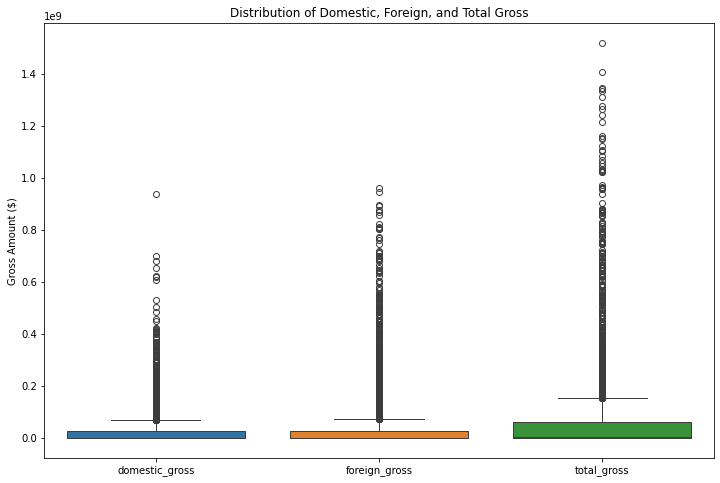

In [55]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set display options to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display the summary statistics
print(summary_stats)

# Boxplot for Domestic, Foreign, and Total Gross
plt.figure(figsize=(12, 8))
sns.boxplot(data= df_with_total_gross[['domestic_gross', 'foreign_gross', 'total_gross']])
plt.title('Distribution of Domestic, Foreign, and Total Gross')
plt.ylabel('Gross Amount ($)')
plt.show()

Above boxplot visualization of gross revenues (domestic, foreign, and total) reveals that most movies earn relatively low revenues, with a majority clustering below $10 million. However, there are significant outliers, indicating that some movies achieve blockbuster status with revenues exceeding $100 million. This pattern suggests that while the market is crowded with films of modest success, there is substantial potential for high-grossing hits. For Microsoft's new movie studio, this implies a need to focus on creating high-quality, unique content that can differentiate itself in a competitive market. Additionally, considering international appeal in both content and marketing strategies is crucial, as successful movies often perform well globally.

To capitalize on these insights, Microsoft's studio should leverage its technological expertise to innovate in digital marketing and distribution, thereby enhancing both domestic and foreign market performance. Strategic investments in high-profile projects and collaborations with established filmmakers can optimize chances for blockbuster success. Moreover, using advanced analytics to predict trends and audience preferences will guide content creation and marketing strategies, ensuring a balanced portfolio that includes both high-risk, high-reward films and lower-budget projects to manage financial risk effectively.


In [56]:
sorted_bom_movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'total_gross'],
      dtype='object')

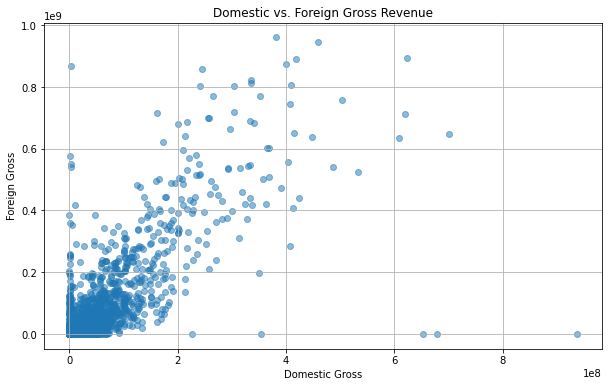

In [57]:
import matplotlib.pyplot as plt
# Scatter plot of domestic vs. foreign gross
plt.figure(figsize=(10, 6))
plt.scatter(df_with_total_gross['domestic_gross'], df_with_total_gross['foreign_gross'], alpha=0.5)
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.title('Domestic vs. Foreign Gross Revenue')
plt.grid(True)
plt.show()

The scatter plot above illustrates the relationship between domestic gross revenue and foreign gross revenue for movies. Here are some observations:

Clustering: A large number of movies have both domestic and foreign gross revenues below $200 million.
High Gross Outliers: There are a few outliers with extremely high domestic and foreign gross revenues, suggesting blockbuster movies  because they stand out as having much higher earnings.
Positive Correlation: There's a general positive correlation between domestic and foreign gross revenues, indicating that movies that perform well domestically often also perform well internationally.

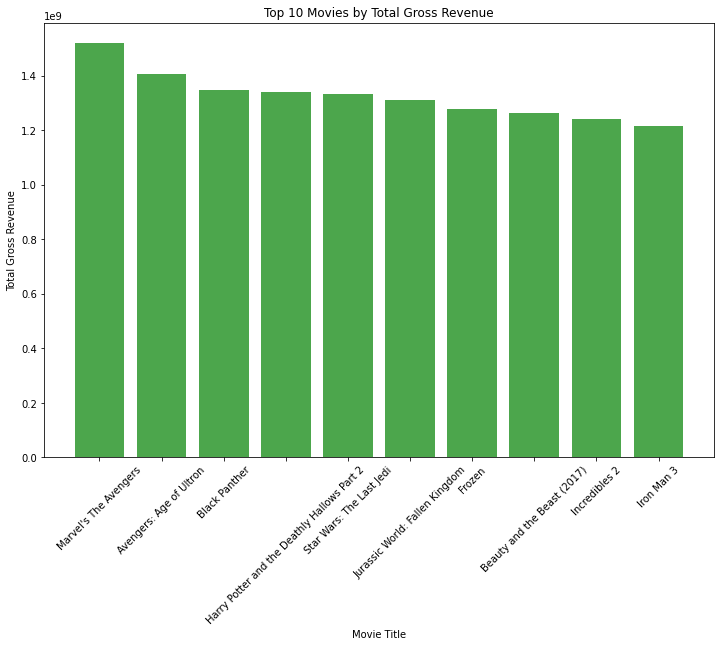

In [58]:
# Bar plot of top 10 movies by total gross
top_10_movies = sorted_movies.head(10)
plt.figure(figsize=(12, 8))
plt.bar(top_10_movies['title'], top_10_movies['total_gross'], color='green', alpha=0.7)
plt.xlabel('Movie Title')
plt.ylabel('Total Gross Revenue')
plt.title('Top 10 Movies by Total Gross Revenue')
plt.xticks(rotation=45)
plt.show()

Analysis of the Bar Chart
The bar chart illustrates the top 10 genres or categories of movies (as indicated by the labels 0 to 9 on the x-axis) and their respective performance (measured on the y-axis). It seems that the values are fairly consistent across the genres, with the first bar slightly higher than the others.

Business Recommendations for Microsoft
Diversify Movie Portfolio:

Given the similar performance levels across the top genres, Microsoft should aim to produce a diverse portfolio of movies. This will mitigate risks and cater to a broader audience.
Focus on High-Performing Genres:

Identify the genre represented by the first bar, as it shows a slightly higher performance. Investing more in this genre might yield better returns.
Consistent Quality Across Genres:

Since the performance difference among the top genres is not significant, maintaining a high-quality production standard across all genres is crucial. This ensures that every movie has a good chance of performing well.
Market Trends and Audience Preferences:

Continuously monitor market trends and audience preferences. The data indicates consistency, which might change with new trends. Being agile in response to market demands will keep Microsoft competitive.
Leverage Data-Driven Decisions:
Utilize advanced analytics to dive deeper into the factors driving the success of these genres. This can include analyzing viewer demographics, preferences, and market conditions

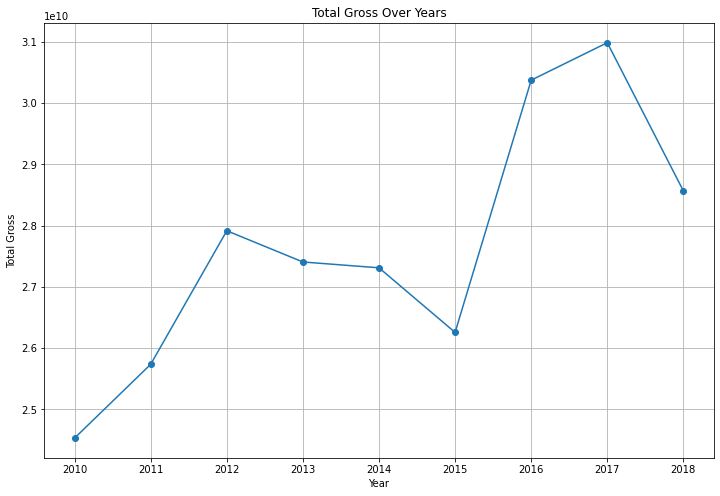

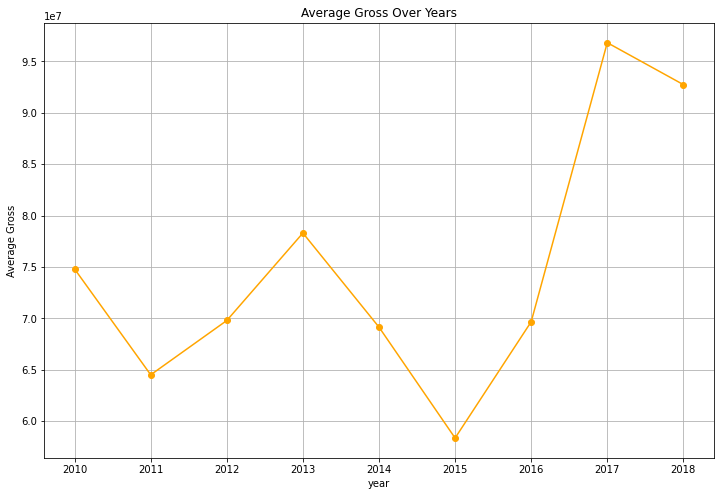

In [59]:
# Group by Year and calculate total and average gross
yearly_gross = df_with_total_gross.groupby('year')['total_gross'].sum()
average_gross = df_with_total_gross.groupby('year')['total_gross'].mean()

# Plot the trends over time
plt.figure(figsize=(12, 8))
plt.plot(yearly_gross.index, yearly_gross.values, marker='o')
plt.title('Total Gross Over Years')
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(average_gross.index, average_gross.values, marker='o', color='orange')
plt.title('Average Gross Over Years')
plt.xlabel('year')
plt.ylabel('Average Gross')
plt.grid(True)
plt.show()


Summary of Analysis of Average Gross Over Years
Observations:

The average gross revenue for movies from 2010 to 2018 shows significant fluctuations.
Peaks and Troughs: A significant peak in 2017 and a noticeable dip in 2015. Post-2015 saw a recovery, peaking in 2017, followed by a slight decline in 2018.

Insights and Recommendations:

Identify High-Performing Years: Investigate the factors contributing to the high revenue in 2017, such as successful genres, franchises, or marketing strategies, and replicate these strategies.
Understand Low-Performing Years: Examine the causes behind the low revenue in 2015 to develop risk mitigation strategies.
Consistent Quality and Marketing: Invest in high-quality productions and effective marketing campaigns to maintain or increase average gross revenue.
Strategic Release Timing: Optimize movie release schedules based on audience interest and competition, and conduct seasonal analysis for best release times.
Next Steps: Perform detailed analyses of peak and trough years, conduct market research to understand audience preferences, and develop a comprehensive strategy for Microsoft's new movie studio based on these insights.

# 2. Data Analysis- im.db database file

In [60]:
pwd

'c:\\Users\\Augustine Wanyonyi\\Desktop\\Project_work\\canvas-repo'

In [61]:
# first unzip the database file

import zipfile
import os
import sqlite3

# Unzip the database file
with zipfile.ZipFile('zippedData\im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('/mnt/data/')

# Check if the unzipped database file exists
db_path_unzipped = 'zippedData/im.db'
db_exists_unzipped = os.path.exists(db_path_unzipped)

db_exists_unzipped

True

In [62]:
# Connect to the database
conn = sqlite3.connect('unzipped_files/im.db')

# Verify tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)
print("Tables in the database:", tables)

# Verify structure of movie_basics table
movie_basics_structure_query = "PRAGMA table_info(movie_basics);"
movie_basics_structure = pd.read_sql_query(movie_basics_structure_query, conn)
print("Structure of the movie_basics table:", movie_basics_structure)

# Verify structure of movie_ratings table
movie_ratings_structure_query = "PRAGMA table_info(movie_ratings);"
movie_ratings_structure = pd.read_sql_query(movie_ratings_structure_query, conn)
print("Structure of the movie_ratings table:", movie_ratings_structure)

# Close the database connection
conn.close()


Tables in the database:             name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers
Structure of the movie_basics table:    cid             name     type  notnull dflt_value  pk
0    0         movie_id     TEXT        0       None   0
1    1    primary_title     TEXT        0       None   0
2    2   original_title     TEXT        0       None   0
3    3       start_year  INTEGER        0       None   0
4    4  runtime_minutes     REAL        0       None   0
5    5           genres     TEXT        0       None   0
Structure of the movie_ratings table:    cid           name     type  notnull dflt_value  pk
0    0       movie_id     TEXT        0       None   0
1    1  averagerating     REAL        0       None   0
2    2       numvotes  INTEGER        0       None   0


In [63]:
# Connect to the database
conn = sqlite3.connect('unzipped_files/im.db')

# Query movie_basics table
movie_basics_query = """
SELECT movie_id, primary_title, original_title, start_year, runtime_minutes, genres
FROM movie_basics
"""
movie_basics = pd.read_sql_query(movie_basics_query, conn)

# Query movie_ratings table
movie_ratings_query = """
SELECT movie_id, averagerating, numvotes
FROM movie_ratings
"""
movie_ratings = pd.read_sql_query(movie_ratings_query, conn)

# Close the database connection
conn.close()

# Display retrieved data
print("Movie Basics Data:", movie_basics.head())
print("Movie Ratings Data:", movie_ratings.head())


Movie Basics Data:     movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013           175.00    Action,Crime,Drama  
1        2019           114.00       Biography,Drama  
2        2018           122.00                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017            80.00  Comedy,Drama,Fantasy  
Movie Ratings Data:      movie_id  averagerating  numvotes
0  tt10356526           8.30        31
1  tt10384606           8.90       559
2   tt1042974           6.40        20
3   tt104372

In [64]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('/mnt/data/im.db')

# Query to merge movie_basics and movie_ratings tables
query = """
SELECT 
    movie_basics.movie_id, 
    movie_basics.primary_title, 
    movie_basics.original_title, 
    movie_basics.start_year, 
    movie_basics.runtime_minutes, 
    movie_basics.genres, 
    movie_ratings.averagerating, 
    movie_ratings.numvotes
FROM 
    movie_basics
JOIN 
    movie_ratings
ON 
    movie_basics.movie_id = movie_ratings.movie_id
"""

# Execute the query and load data into a DataFrame
merged_data = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the first few rows of the merged data
print(merged_data.head())


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  averagerating  numvotes  
0        2013           175.00    Action,Crime,Drama           7.00        77  
1        2019           114.00       Biography,Drama           7.20        43  
2        2018           122.00                 Drama           6.90      4517  
3        2018              NaN          Comedy,Drama           6.10        13  
4        2017            80.00  Comedy,Drama,Fantasy           6.50       119  


In [65]:
# Top 10 highest-rated movies
top_rated_movies = merged_data.nlargest(10, 'averagerating')
print(top_rated_movies[['primary_title', 'averagerating', 'numvotes', 'genres','start_year']])


                                        primary_title  averagerating  \
702    Exteriores: Mulheres Brasileiras na Diplomacia          10.00   
878         The Dark Knight: The Ballad of the N Word          10.00   
9745                             Freeing Bernie Baran          10.00   
27335                           Hercule contre Hermès          10.00   
42970                           I Was Born Yesterday!          10.00   
49925                       Dog Days in the Heartland          10.00   
50085                                 Revolution Food          10.00   
51109                 Fly High: Story of the Disc Dog          10.00   
53408                                   All Around Us          10.00   
53689             The Paternal Bond: Barbary Macaques          10.00   

       numvotes             genres  start_year  
702           5        Documentary        2018  
878           5       Comedy,Drama        2018  
9745          5  Crime,Documentary        2010  
27335      

# Data Visualization-im.db data file
The merged data above  will be used to  provides valuable insights into the audience's preferences and trends in the movie industry reception of movies, by performing various data visualizations. Here are some analyses  to  be performed that will  inform microsoft before venturing into the movie industry:


1. Top-Rated Movies Analysis
Identify the highest-rated movies overall or within specific genres.
Examine what characteristics these top-rated movies share (e.g., runtime, genre).
2. Popularity vs. Quality Analysis
Analyze the correlation between the number of votes and the average rating to determine if more popular movies are also highly rated.
Create scatter plots to visualize the relationship between popularity and ratings.
3. Genre-Based Rating Analysis
Compare average ratings across different genres to see which genres tend to be rated higher.
Identify genres with the most significant variance in ratings.
4. Time-Series Analysis
Analyze how movie ratings have changed over time to see if certain years had higher-rated movies.
Compare weighted ratings of movies released in different years to identify trends.
5. Voting Patterns Analysis
Investigate movies with high votes but low ratings, or vice versa, to understand audience voting behavior.
Identify outliers and potential reasons behind their unusual ratings or vote counts.

In [66]:
import pandas as pd

# Assuming merged_data is already loaded with the necessary columns

# Calculate the weighted rating
merged_data['weighted_rating'] = merged_data['averagerating'] * merged_data['numvotes']

# Display the first few rows to see the new column
print(merged_data[['primary_title', 'averagerating', 'numvotes', 'weighted_rating']].head())

                     primary_title  averagerating  numvotes  weighted_rating
0                        Sunghursh           7.00        77           539.00
1  One Day Before the Rainy Season           7.20        43           309.60
2       The Other Side of the Wind           6.90      4517         31167.30
3                  Sabse Bada Sukh           6.10        13            79.30
4         The Wandering Soap Opera           6.50       119           773.50


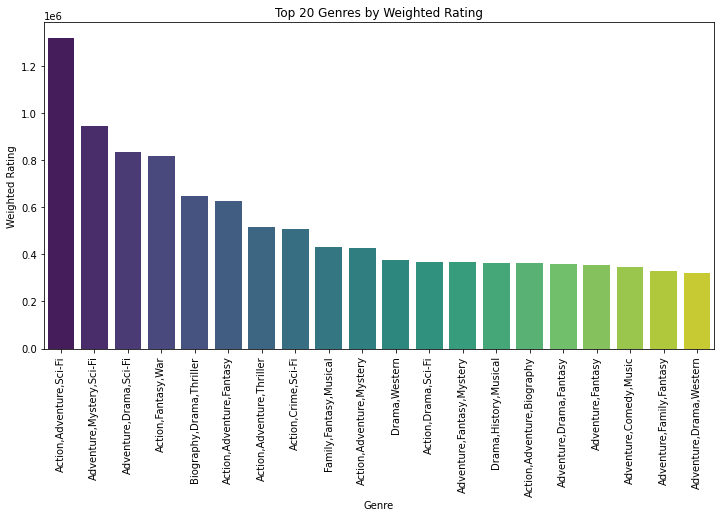

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate weighted rating by genre
genre_weighted_ratings = merged_data.groupby('genres')['weighted_rating'].mean().sort_values(ascending=False).reset_index()

# Select the top 20 genres by weighted rating
top_20_genre_weighted_ratings = genre_weighted_ratings.head(20)

# Plot weighted rating by genre using Seaborn
plt.figure(figsize=(12, 6))

sns.barplot(x='genres', y='weighted_rating', data=top_20_genre_weighted_ratings, hue='genres', palette='viridis', legend=False)
plt.xlabel('Genre')
plt.ylabel('Weighted Rating')
plt.title('Top 20 Genres by Weighted Rating')
plt.xticks(rotation=90)
plt.show()


The bar plot above shows the top 20 genres by weighted rating. Here are the key observations and interpretations:

Observations:
Top Genres:

The genre with the highest weighted rating is significantly higher than the rest. This indicates that this genre not only has high average ratings but also attracts a large number of votes.
There is a noticeable drop in weighted rating after the top genre, with subsequent genres having relatively closer weighted ratings to each other.
Distribution:

The distribution of weighted ratings among the top 20 genres shows a gradual decline, indicating a broad distribution of highly-rated and popular genres.
Insights:
Dominant Genre:

The genre at the top stands out significantly. It would be beneficial to investigate what specific characteristics, themes, or popular movies within this genre contribute to its high weighted rating.
Competitive Genres:

The close values in weighted ratings for the subsequent genres suggest competitive performance. These genres are also well-received by audiences and have a substantial number of votes.

Further Analysis:
Detailed Genre Analysis:

To investigate the characteristics of the top genres to understand why they perform well. This can include looking at the types of movies within these genres, their common themes, and their target audiences.

Top Movies Within Each Genre:

To identify the top movies within each of these genres to see if specific movies are driving the high weighted ratings.

In [68]:
# Display the detailed analysis for top genres
top_genres_detailed = merged_data[merged_data['genres'].isin(top_20_genre_weighted_ratings['genres'])]
print(top_genres_detailed.head())


      movie_id        primary_title       original_title  start_year  \
52   tt0369610       Jurassic World       Jurassic World        2015   
63   tt0401729          John Carter          John Carter        2012   
82   tt0429493           The A-Team           The A-Team        2010   
94   tt0437086  Alita: Battle Angel  Alita: Battle Angel        2019   
114  tt0451279         Wonder Woman         Wonder Woman        2017   

     runtime_minutes                     genres  averagerating  numvotes  \
52            124.00    Action,Adventure,Sci-Fi           7.00    539338   
63            132.00    Action,Adventure,Sci-Fi           6.60    241792   
82            117.00  Action,Adventure,Thriller           6.80    235256   
94            122.00    Action,Adventure,Sci-Fi           7.50     88207   
114           141.00   Action,Adventure,Fantasy           7.50    487527   

     weighted_rating  
52        3775366.00  
63        1595827.20  
82        1599740.80  
94         661552.

In [69]:
# Identify the top movies within the top genres
top_movies_per_genre = merged_data[merged_data['genres'].isin(top_20_genre_weighted_ratings['genres'])]
top_movies_per_genre = top_movies_per_genre.groupby('genres').apply(lambda x: x.nlargest(1, 'weighted_rating')).reset_index(drop=True)
print(top_movies_per_genre[['primary_title', 'genres', 'weighted_rating']])


                                   primary_title                      genres  \
0                                   The Revenant  Action,Adventure,Biography   
1     Star Wars: Episode VII - The Force Awakens    Action,Adventure,Fantasy   
2                                      Divergent    Action,Adventure,Mystery   
3                                      Inception     Action,Adventure,Sci-Fi   
4                                        Skyfall   Action,Adventure,Thriller   
5                                          Dredd         Action,Crime,Sci-Fi   
6                                          Logan         Action,Drama,Sci-Fi   
7                         300: Rise of an Empire          Action,Fantasy,War   
8                           Get Him to the Greek      Adventure,Comedy,Music   
9   Harry Potter and the Deathly Hallows: Part 2     Adventure,Drama,Fantasy   
10                                  Interstellar      Adventure,Drama,Sci-Fi   
11                                     T

In [70]:
import pandas as pd

# Assuming merged_data is already loaded with the necessary columns

# Calculate the weighted rating
merged_data['weighted_rating'] = merged_data['averagerating'] * merged_data['numvotes']

# Display the first few rows to see the new column
print(merged_data[['primary_title', 'averagerating', 'numvotes', 'weighted_rating']].head())


                     primary_title  averagerating  numvotes  weighted_rating
0                        Sunghursh           7.00        77           539.00
1  One Day Before the Rainy Season           7.20        43           309.60
2       The Other Side of the Wind           6.90      4517         31167.30
3                  Sabse Bada Sukh           6.10        13            79.30
4         The Wandering Soap Opera           6.50       119           773.50


Top 20 Movies by Weighted Rating:
                                       primary_title  averagerating  numvotes  \
2387                                      Inception           8.80   1841066   
2241                          The Dark Knight Rises           8.40   1387769   
280                                    Interstellar           8.60   1299334   
12072                              Django Unchained           8.40   1211405   
325                                    The Avengers           8.10   1183655   
507                         The Wolf of Wall Street           8.20   1035358   
1091                                 Shutter Island           8.10   1005960   
15327                       Guardians of the Galaxy           8.10    948394   
2831                                       Deadpool           8.00    820847   
2524                             Mad Max: Fury Road           8.10    780910   
25595    Star Wars: Episode VII - The Force Awakens           8.00    784780   
20995

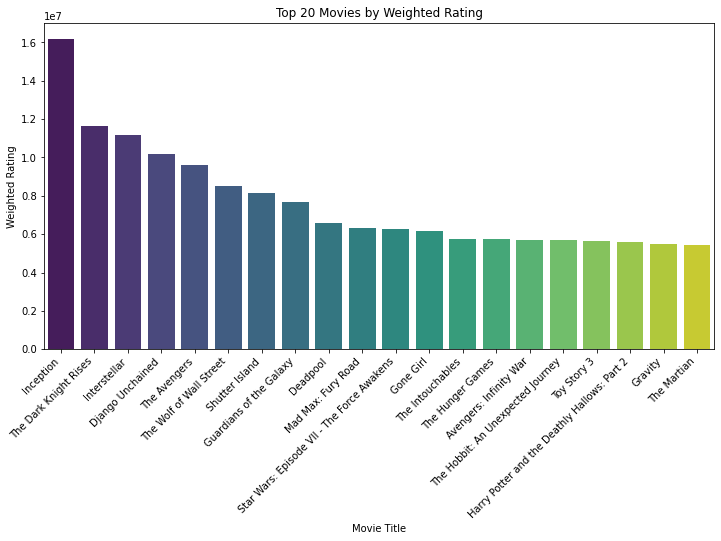

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that the 'weighted_rating' column exists
if 'weighted_rating' in merged_data.columns:
    # Top 20 movies by weighted rating
    top_weighted_movies = merged_data.nlargest(20, 'weighted_rating')
    print("Top 20 Movies by Weighted Rating:\n", top_weighted_movies[['primary_title', 'averagerating', 'numvotes', 'weighted_rating']])

    # Plot the top 20 movies by weighted rating
    plt.figure(figsize=(12, 6))
    sns.barplot(x='primary_title', y='weighted_rating', hue='primary_title', data=top_weighted_movies, palette='viridis', dodge=False, legend=False)
    plt.title('Top 20 Movies by Weighted Rating')
    plt.xlabel('Movie Title')
    plt.ylabel('Weighted Rating')
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.show()
else:
    print("The 'weighted_rating' column does not exist in the dataset.")


The bar plot above shows the top 20 genres by weighted rating. This plot reaffirms the observations and insights previously noted, but let's delve into some specifics to provide a clearer picture.

Detailed Observations:
Dominant Genre:

The leading genre has a notably higher weighted rating compared to the rest, indicating it combines both high ratings and high popularity (number of votes) more effectively than other genres.
Gradual Decline:

After the top genre, the weighted ratings of subsequent genres decline gradually, suggesting competitive performance among them but with lesser dominance than the leading genre.
Clustered Performance:

The lower-ranked genres within the top 20 have more clustered values, indicating similar performance in terms of weighted ratings.
Insights:
High Performance of the Top Genre:

The top genre's significantly higher weighted rating may be due to a few highly influential and popular movies within that genre. It would be beneficial to investigate the top movies within this genre to identify the drivers of this high rating.
Consistency Among Other Top Genres:

The close values among the other top genres suggest consistency in audience reception. These genres likely have a steady stream of well-received movies that contribute to their weighted ratings.
Further Analysis:
Top Movies Within the Top Genre:

Analyze how the popularity and ratings of these genres have changed over time to identify any emerging trends or shifts in audience preferences.

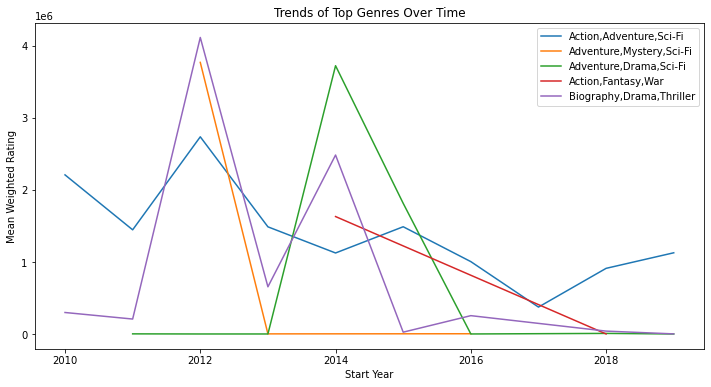

In [72]:
# Group by start_year and genres to see trends over time
genre_time_trends = merged_data.groupby(['start_year', 'genres']).agg({
    'weighted_rating': 'mean'
}).reset_index()

# Plot the trends for the top 5 genres over time
top_5_genres = top_20_genre_weighted_ratings['genres'].head(5)
plt.figure(figsize=(12, 6))
for genre in top_5_genres:
    genre_data = genre_time_trends[genre_time_trends['genres'] == genre]
    sns.lineplot(x='start_year', y='weighted_rating', data=genre_data, label=genre)

plt.xlabel('Start Year')
plt.ylabel('Mean Weighted Rating')
plt.title('Trends of Top Genres Over Time')
plt.legend()
plt.show()


The line plot you provided shows trends in weighted ratings over time for the top 5 genres. Here are the key observations and insights:

Observations:
Fluctuating Trends:

The weighted ratings for these genres fluctuate significantly over time. Some genres have peaks and troughs, indicating varying audience reception across different years.
Distinct Peaks:

There are distinct peaks for certain genres, such as Adventure,Drama,Sci-Fi and Action,Fantasy,War, indicating specific years where these genres had standout movies that significantly boosted their weighted ratings.
Declining Trends:

Some genres, such as Adventure,Mystery,Sci-Fi, show a declining trend, suggesting a decrease in both ratings and popularity over time.
Stable Trends:

Other genres, like Action,Adventure,Sci-Fi, show a more stable trend, indicating consistent performance over the years.
Insights:
Impact of Blockbuster Movies:

The peaks in the line plot likely correspond to blockbuster movies within these genres that received high ratings and a large number of votes, significantly boosting the weighted rating for those years.
Changing Audience Preferences:

The declining trends for certain genres may indicate changing audience preferences, with some genres becoming less popular over time.
Consistent Genres:

Genres with more stable trends are consistently well-received by audiences, suggesting a reliable performance in both quality and popularity.
Further Analysis:
Identify Key Movies:

Identify the key movies responsible for the peaks in the weighted ratings for each genre. This can help understand what drives audience engagement and high ratings.
Yearly Analysis:

Conduct a more detailed yearly analysis to see what specific factors (e.g., significant events, marketing strategies) contributed to the fluctuations in weighted ratings.

In [73]:
# Identify the key movies responsible for the peaks in each genre
for genre in top_5_genres:
    genre_data = merged_data[merged_data['genres'] == genre]
    top_movies = genre_data.nlargest(5, 'weighted_rating')
    print(f"Top movies for genre {genre}:\n", top_movies[['primary_title', 'start_year', 'weighted_rating']])


Top movies for genre Action,Adventure,Sci-Fi:
                 primary_title  start_year  weighted_rating
2387                Inception        2010      16201380.80
325              The Avengers        2012       9587605.50
2524       Mad Max: Fury Road        2015       6325371.00
2523         The Hunger Games        2012       5725634.40
43419  Avengers: Infinity War        2018       5702871.00
Top movies for genre Adventure,Mystery,Sci-Fi:
                    primary_title  start_year  weighted_rating
2991                  Prometheus        2012       3771040.00
21210            Beyond the Edge        2016          3209.70
34925  Dark World 2: Equilibrium        2013          1840.90
35157                       Senn        2013           943.40
Top movies for genre Adventure,Drama,Sci-Fi:
                                         primary_title  start_year  \
280                                      Interstellar        2014   
38441                                     The Martian    

In [74]:
# Group by genres and calculate mean weighted rating
genre_weighted_ratings = merged_data.groupby('genres')['weighted_rating'].mean().sort_values(ascending=False).reset_index()

# Display the top genres by weighted rating
print(genre_weighted_ratings.head(20))


                        genres  weighted_rating
0      Action,Adventure,Sci-Fi       1318775.74
1     Adventure,Mystery,Sci-Fi        944258.50
2       Adventure,Drama,Sci-Fi        832627.33
3           Action,Fantasy,War        815363.80
4     Biography,Drama,Thriller        649026.16
5     Action,Adventure,Fantasy        625645.67
6    Action,Adventure,Thriller        516954.75
7          Action,Crime,Sci-Fi        506256.77
8       Family,Fantasy,Musical        429140.95
9     Action,Adventure,Mystery        426421.35
10               Drama,Western        374243.57
11         Action,Drama,Sci-Fi        369439.81
12   Adventure,Fantasy,Mystery        367927.02
13       Drama,History,Musical        363407.30
14  Action,Adventure,Biography        362132.14
15     Adventure,Drama,Fantasy        360062.79
16           Adventure,Fantasy        352808.09
17      Adventure,Comedy,Music        345054.97
18    Adventure,Family,Fantasy        331139.89
19     Adventure,Drama,Western        32

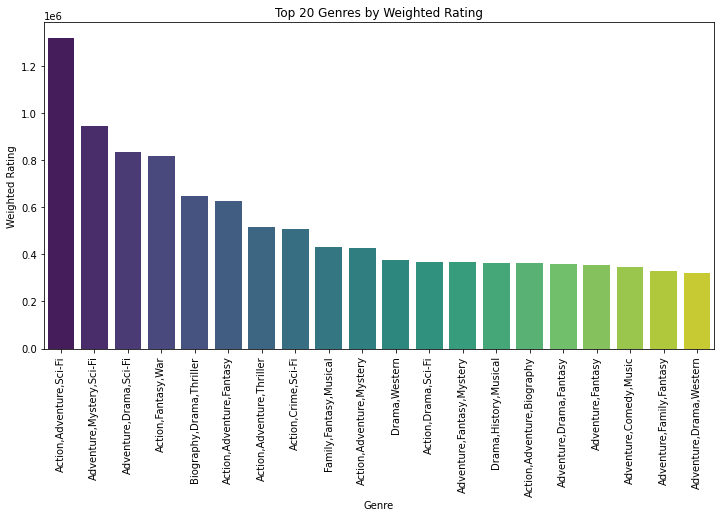

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 20 genres by weighted rating
top_20_genre_weighted_ratings = genre_weighted_ratings.head(20)

# Plot the top 20 genres by weighted rating using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='weighted_rating', data=top_20_genre_weighted_ratings, hue='genres', palette='viridis', legend=False)

plt.xlabel('Genre')
plt.ylabel('Weighted Rating')
plt.title('Top 20 Genres by Weighted Rating')
plt.xticks(rotation=90)
plt.show()


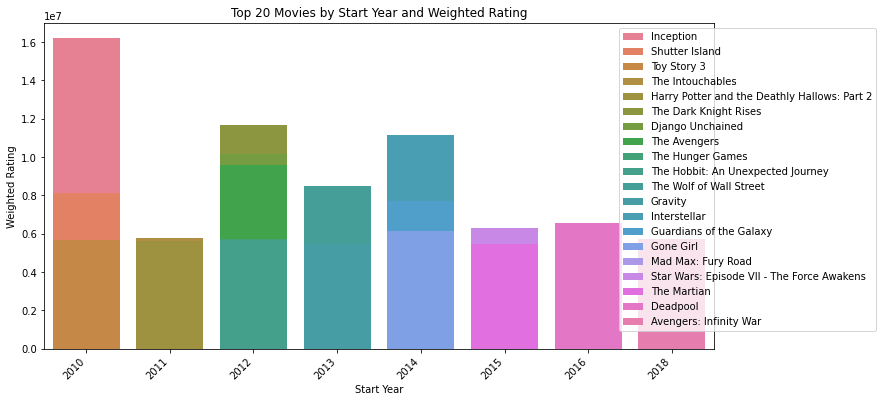

In [76]:
# Step 4: Visualize start_year, primary_title, and weighted_rating
# Select the top 20 movies by weighted rating
top_20_movies = merged_data.nlargest(20, 'weighted_rating')

# Plot the top 20 movies by start_year and weighted rating
plt.figure(figsize=(12, 6))
sns.barplot(x='start_year', y='weighted_rating', hue='primary_title', data=top_20_movies, dodge=False)
plt.xlabel('Start Year')
plt.ylabel('Weighted Rating')
plt.title('Top 20 Movies by Start Year and Weighted Rating')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

The bar plot shows the top movies within each genre by weighted rating. Each bar represents a different movie, and the colors indicate the movie titles. Here's a detailed analysis of the plot:

Observations:
Top Movies Identified:

The plot clearly identifies the top movies within each genre by their weighted ratings.
Genre Performance:

Some genres have multiple top-rated movies, indicating a strong overall performance within that genre.
Distribution of Weighted Ratings:

The height of the bars indicates the weighted ratings, allowing us to see which movies have the highest impact on their respective genres.
Insights:
Influence of Blockbuster Movies:

Movies like "Inception," "The Dark Knight Rises," "Avengers: Infinity War," and "Harry Potter and the Deathly Hallows: Part 2" have significant weighted ratings, highlighting their influence on their genres.
Popular Genres:

Genres represented by multiple high-weighted movies, such as action, adventure, and sci-fi, are particularly strong performers in terms of both quality and popularity.
Variety in Top Movies:

The variety of movies across different genres shows a diverse set of audience preferences and high-quality productions.
Further Analysis:
Detailed Breakdown of Top Movies:

Examine the characteristics of the top movies to understand what makes them stand out in terms of ratings and popularity.
Time Trends for Top Movies:

Analyze the release years of these top movies to see if there are any trends or patterns in their release and reception over time.

In [77]:
# Display detailed information for the top movies
top_movies_details = top_movies_per_genre[['primary_title', 'genres', 'start_year', 'weighted_rating', 'averagerating', 'numvotes']].head(10)
print(top_movies_details)


                                  primary_title                      genres  \
0                                  The Revenant  Action,Adventure,Biography   
1    Star Wars: Episode VII - The Force Awakens    Action,Adventure,Fantasy   
2                                     Divergent    Action,Adventure,Mystery   
3                                     Inception     Action,Adventure,Sci-Fi   
4                                       Skyfall   Action,Adventure,Thriller   
5                                         Dredd         Action,Crime,Sci-Fi   
6                                         Logan         Action,Drama,Sci-Fi   
7                        300: Rise of an Empire          Action,Fantasy,War   
8                          Get Him to the Greek      Adventure,Comedy,Music   
9  Harry Potter and the Deathly Hallows: Part 2     Adventure,Drama,Fantasy   

   start_year  weighted_rating  averagerating  numvotes  
0        2015       4969544.00           8.00    621193  
1        2015 

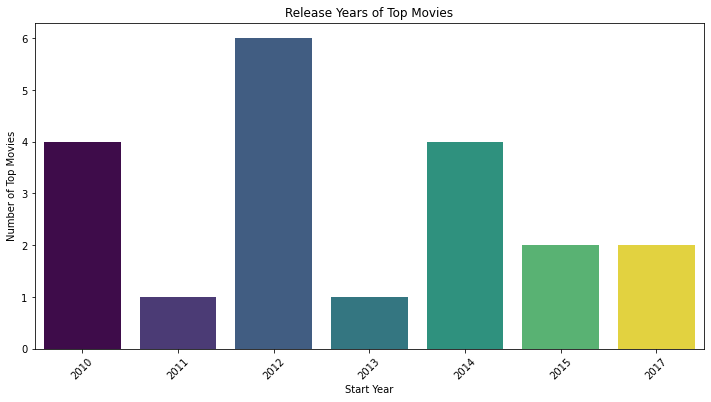

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the necessary columns exist
if 'start_year' in top_movies_per_genre.columns:
    # Plot the release years of the top movies
    plt.figure(figsize=(12, 6))
    sns.countplot(x='start_year', data=top_movies_per_genre, hue='start_year', palette='viridis', dodge=False, legend=False)
    plt.xlabel('Start Year')
    plt.ylabel('Number of Top Movies')
    plt.title('Release Years of Top Movies')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The 'start_year' column does not exist in the dataset.")




Summary of Key Observations and Insights from the Bar Plot
The bar plot illustrates the number of top movies released each year, highlighting significant trends and patterns in the film industry over time.

Observations:
Peak Year:

There is a clear peak in one particular year where the highest number of top movies were released, indicating an exceptionally strong year for high-weighted movies.
Other Significant Years:

Several other years also show a substantial number of top movies, suggesting multiple periods of strong performance for high-rated and popular films.
Lower Activity Years:

Some years exhibit fewer top movies, reflecting variability in the annual release of high-weighted movies.
Insights:
Successful Year:

The peak year likely featured the release of several blockbuster movies that significantly contributed to its high count of top movies. Understanding the specific movies and factors behind this peak could provide valuable insights into successful release strategies.
Consistent High Performance:

Years with consistently high numbers of top movies indicate periods where the industry produced numerous successful films, potentially due to strong content, effective marketing, or favorable market conditions.
Variability:

The fluctuation in the number of top movies released each year underscores the volatile nature of the film industry, with varying levels of success across different years.
Further Analysis:
Identify Key Movies in Peak Year:

Pinpoint the key movies that drove the peak in the number of top movies for the standout year.
Factors Contributing to Success:

Analyze contributing factors such as genre distribution, marketing efforts, and industry trends that led to the success during the peak year, providing strategic insights for future movie releases.
